In [24]:
# 주택 가격 예측: 회귀분석
# 회귀분석 : 연속적인 값을 예측
# 예) 과거 기상 데이터를 입력하여 내일의 기온을 예측
# 보스턴 주택 가격 데이터셋
# 1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터로 주택 가격 예측
# 샘플 개수 : 506개(학습용 404개, 검증용 102개)

from keras.datasets import boston_housing
# c:/사용자/본인계정/.keras/datasets 디렉토리에 다운로드됨

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [25]:
# 학습용 404개, 검증용 102,개 13개의 변수
print(X_train.shape)
print(X_train.shape[1])

(404, 13)
13


In [26]:
X_test.shape

(102, 13)

In [27]:
# 독립 변수 목록
# 1. Per capita crime rate.
# 2. Proportion of residential land zoned for lots over 25,000 square feet.
# 3. Proportion of non-retail business acres per town.
# 4. Charles River dummy variable (= 1 if tract bounds river 0 otherwise).
# 5. Nitric oxides concentration (parts per 10 million).
# 6. Average number of rooms per dwelling.
# 7. Proportion of owner-occupied units built prior to 1940.
# 8. Weighted distances to five Boston employment centres.
# 9. Index of accessibility to radial highways.
# 10. Full-value property-tax rate per $10,000.
# 11. Pupil-teacher ratio by town.
# 12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
# 13. % lower status of the population.
# 종속변수 : 주택의 가격(천달러 단위)
# 주택가격(10000~50000달러, 1970년대 중반 가격)
y_train[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

<AxesSubplot:>

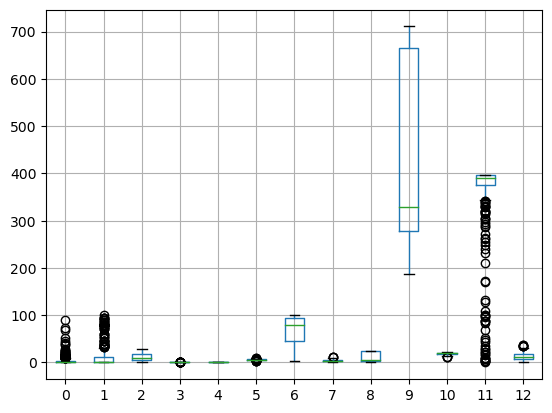

In [28]:
import pandas as pd
pd.DataFrame(X_train).boxplot()

<AxesSubplot:>

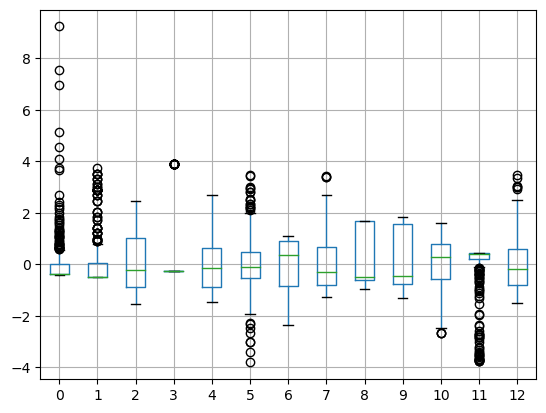

In [29]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 평균 0, 표준편차 1로 만드는 스케일러
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
pd.DataFrame(X_train_scaled).boxplot()

In [30]:
# 활성화 함수 : 입력데이터를 적절하게 처리하여 출력데이터를 만들어내는 함수
# input data -> {activation function} -> output data
# 활성화 함수의 종류 : 탄젠트(thanh) 함수, 시그모이드(sigmoid) 함수,
# ReLU 함수 : 탄젠트 함수나 시그모이드 함수보다 학습시간이 빨라서 최근에는 ReLU(Rectified Linear Unit)가 많이 사용되고 있음

from keras import models, layers
# 64개의 노드를 가진 은닉층 2개의 신경망

def build_model():
    model = models.Sequential() # 신경망 모델
    # relu
    model.add(layers.Dense(64, activation='relu', 
                           input_shape=(X_train.shape[1], )))
    # Dense(output, activation, input_shape)
    #       출력노드수, 활성화함수, 입력데이터의 차원
    model.add(layers.Dense(64, activation='relu'))
    #출력층(1개의 노드, 하나의 값을 예측하는 회귀분석의 경우 활성화 함수가 없는 선형층을 사용함)
    model.add(layers.Dense(1))
    # mse 손실 함수를 사용하여 컴파일
    # mse : 평균 제곱 오차(mean squared error) - 예측값과 실제값의 거리의 제곱
    # mae : 평균 절대 오차, 예측값과 실제값의 거리의 절대값
    # metrics 평가지표, 검증용 데이터셋으로 평가하는 기준
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    #               최적화함수          손실함수        평가기준
    return model

model = build_model()

In [31]:
# 모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
7/7 [==============================] - 0s 5ms/step - loss: 543.6238 - mae: 21.4122
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 486.6091 - mae: 20.0630
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 431.3149 - mae: 18.6853
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 374.4965 - mae: 17.1953
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 315.3862 - mae: 15.5706
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 256.0872 - mae: 13.7858
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 201.0322 - mae: 11.9254
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 152.0343 - mae: 10.0967
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 113.2127 - mae: 8.5043
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 86.0751 - mae: 7.2681
Epoch 11/100
7/7 [==============================] - 

In [32]:
# 검증용 데이터로 모델 평가
mse, mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(mse)
print(mae) # 2633 달러 정도 차이

4/4 [==============================] - 0s 3ms/step - loss: 19.2571 - mae: 2.7025
19.25708770751953
2.7024714946746826


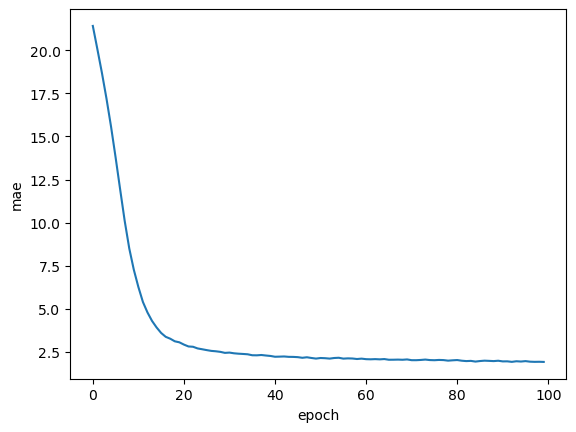

In [33]:
import matplotlib.pyplot as plt
plt.plot(hist.history["mae"])
plt.ylabel("mae")
plt.xlabel("epoch")
plt.show()

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [35]:
from keras.models import load_model

model.save('mymodel.h5')

del model
model = load_model('mymodel.h5')